# Zgony według tygodni, GUS
## W podziale na województwa, powiaty i 5-letnie grupy wiekowe

Potrzebne funkcje w plikach:
* helper_functions.py
* govpl_function.py

Uwaga: 
...

## TODO
* ...

In [11]:
"""
Set PYTHONPATH for modules in parallel directory

https://stackoverflow.com/questions/3108285/in-python-script-how-do-i-set-pythonpath/3108301

"""

import sys

try:
    sys.path.index('..') # Or os.getcwd() for this directory
except ValueError:
    sys.path.append('..') # Or os.getcwd() for this directory

#--------------------------------------------------------------

from share.helper_functions import (
    getfile, 
    unzip, 
    xlsx2xls, 
    display_all,
    set_legend_right,
    plot

)
from typing import NamedTuple
from share.gus_functions import (
    GUSparams,
    Analysis
    )
# import govpl_functions as govpl
import pandas as pd
import importlib
import glob
import os
from sorcery import dict_of
import matplotlib.pyplot as plt


In [12]:
params = dict_of(
    data_dir = './gus_data',
    img_dir = './images',
    url =\
    'https://stat.gov.pl/download/gfx/portalinformacyjny/pl/defaultaktualnosci/5468/39/2/1/zgony_wg_tygodni.zip',
    zipfile = 'zgony_wg_tygodni.zip',
    file_prefix = 'Zgony wedêug tygodni w Polsce_',
    file_prefix_terminal = 'Zgony\ wedêug\ tygodni\ w\ Polsce_',
    file_suffix = '.xlsx',
    libreoffice_cmd = 'libreoffice7.2',
    year_start = 2000,
    year_end = 2021
)


In [13]:
mygus = Analysis(params)

In [14]:
mygus.getdata()

Getting GUS data...
Reading ./gus_data/Zgony wedêug tygodni w Polsce_.csv
Done.


In [15]:
mygus.all_years_df

,Wiek zmarłych w latach,NUTS,Podregiony,T01,T02,T03,T04,T05,T06,T07,...,T45,T46,T47,T48,T49,T50,T51,T52,Rok,T53
0,Ogółem,PL,Polska,7913,8292,8970,9380,9474,8591,7841,...,6825,6873.0,7182.0,7173.0,7006.0,7296.0,7402.0,8000.0,2000,NaN
1,Ogółem,PL2,Makroregion Południowy,1629,1695,1805,1792,1754,1597,1520,...,1463,1380.0,1417.0,1444.0,1427.0,1533.0,1535.0,1603.0,2000,NaN
2,Ogółem,PL21,Małopolskie,616,636,676,675,665,649,548,...,584,513.0,555.0,546.0,531.0,601.0,593.0,617.0,2000,NaN
3,Ogółem,PL213,Miasto Kraków,139,162,156,167,162,154,135,...,148,103.0,134.0,126.0,137.0,131.0,140.0,149.0,2000,NaN
4,Ogółem,PL214,Krakowski,128,130,130,148,158,151,116,...,126,110.0,125.0,119.0,125.0,151.0,132.0,129.0,2000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43115,90 i więcej,PL922,Ciechanowski,15,17,11,14,16,14,17,...,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,NaN
43116,90 i więcej,PL923,Płocki,18,11,9,17,14,11,14,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,NaN
43117,90 i więcej,PL924,Ostrołęcki,21,25,27,19,15,17,16,...,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,NaN
43118,90 i więcej,PL925,Siedlecki,11,17,18,18,19,17,21,...,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,NaN


In [16]:
df = mygus.all_years_df

Q = '(`Wiek zmarłych w latach` == "Ogółem")  & (NUTS == "PL")'

df_og = df.query(Q).copy(deep=True)
df_og.drop(['Wiek zmarłych w latach', 'NUTS', 'Podregiony' ], axis=1, inplace=True)
df_og = df_og.set_index('Rok').T.reset_index(drop=True)
df_og.index.name = 'Tydzień'

In [17]:
df_og

Rok,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Tydzień,,,,,,,,,,,,,,,,,,,,,
0,7913.0,7662.0,6889.0,8117.0,7568.0,7477.0,7504.0,7549.0,8160.0,8421.0,...,7557.0,9309.0,7533.0,7984.0,8215.0,9279.0,8372.0,8668.0,8463.0,11470.0
1,8292.0,7359.0,7053.0,7699.0,7741.0,7225.0,7298.0,7381.0,7773.0,8843.0,...,7442.0,9030.0,7317.0,7754.0,7920.0,10225.0,8078.0,8586.0,8242.0,10970.0
2,8970.0,7232.0,7286.0,7442.0,7648.0,7374.0,7425.0,7242.0,7851.0,8794.0,...,7655.0,9041.0,7261.0,7800.0,7683.0,9875.0,8639.0,8700.0,8059.0,11016.0
3,9380.0,7548.0,7027.0,7425.0,7555.0,7473.0,7964.0,7354.0,7657.0,9472.0,...,7368.0,8938.0,7463.0,7559.0,7977.0,9946.0,8793.0,8798.0,8015.0,10388.0
4,9474.0,7319.0,6771.0,7405.0,7802.0,7461.0,7639.0,7332.0,7437.0,9169.0,...,7728.0,8803.0,7713.0,7963.0,7970.0,10076.0,8987.0,9362.0,8560.0,9880.0
5,8591.0,7469.0,6844.0,7613.0,7972.0,7688.0,7403.0,7636.0,7588.0,9141.0,...,8133.0,8401.0,7837.0,8166.0,8145.0,9432.0,9088.0,9269.0,8343.0,9925.0
6,7841.0,7078.0,6694.0,7658.0,7272.0,7937.0,7327.0,7501.0,7576.0,8509.0,...,8258.0,8159.0,7584.0,8873.0,7928.0,9221.0,9128.0,9241.0,8624.0,10116.0
7,7532.0,6972.0,6983.0,7972.0,7246.0,7798.0,7122.0,7923.0,7678.0,8191.0,...,7699.0,7839.0,7524.0,8985.0,7861.0,9053.0,9333.0,8717.0,8474.0,9894.0
8,7526.0,7303.0,6879.0,8276.0,7260.0,8057.0,7079.0,8323.0,7862.0,7869.0,...,7515.0,7788.0,7627.0,9068.0,8002.0,8388.0,9864.0,8620.0,8471.0,10155.0


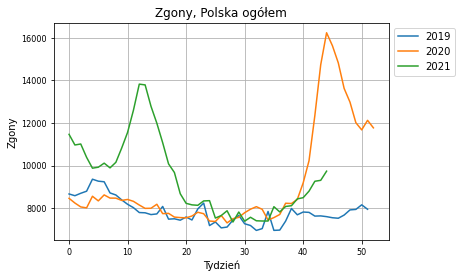

In [18]:
# %load_ext autoreload
# %autoreload

# from share.helper_functions import (
#     getfile, 
#     unzip, 
#     xlsx2xls, 
#     display_all,
#     set_legend_right,
#     plot
# )



plotopts = dict_of(
    plotdf=df_og, 
    cols_to_plot = [2019,2020,2021], 
    ylabel = 'Zgony',
    title = 'Zgony, Polska ogółem',
    fontsize = 8
    )

plot(**plotopts);

In [19]:
# df = mygus.all_years_df

# Q = '(`Wiek zmarłych w latach` == "Ogółem")  & (Podregiony == "Lubelskie")'
# dfl=dict()
# dfl["Lubelskie"] = (df.query(Q).copy(deep=True))
# dfl["Lubelskie"].drop(['Wiek zmarłych w latach', 'NUTS', 'Podregiony' ], axis=1, inplace=True)
# dfl["Lubelskie"] = dfl["Lubelskie"].set_index('Rok').T.reset_index(drop=True)
# dfl["Lubelskie"].index.name = 'Tydzień'

# Q = '(`Wiek zmarłych w latach` == "Ogółem")  & (Podregiony == "Podlaskie")'

# dfl["Podlaskie"] = (df.query(Q).copy(deep=True))
# dfl["Podlaskie"].drop(['Wiek zmarłych w latach', 'NUTS', 'Podregiony' ], axis=1, inplace=True)
# dfl["Podlaskie"] = dfl["Podlaskie"].set_index('Rok').T.reset_index(drop=True)
# dfl["Podlaskie"].index.name = 'Tydzień'

# plotopts = dict_of(
#     plotdf=[dfl["Lubelskie"],dfl["Podlaskie"]], 
#     cols_to_plot = [2019,2020,2021], 
#     ylabel = 'Zgony',
#     title = 'Zgony, Lubelskie',
#     fontsize = 8
#     )

# plot(**plotopts);

In [20]:
# dfl.values()